In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
df= pd.read_csv('driver-data.csv')

In [12]:
df.shape

(4000, 3)

In [13]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [16]:
features= df.drop(columns=['id'])

In [18]:
std_sca=StandardScaler()
features= pd.DataFrame(std_sca.fit_transform(features),columns=features.columns)
features.head()

,mean_dist_day,mean_over_speed_perc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


In [21]:
kmeans= KMeans(n_clusters=4)
cluster= kmeans.fit(features)
np.unique(cluster.labels_)

array([0, 1, 2, 3], dtype=int32)

In [30]:
df['cluster']= cluster.labels_
df[df.cluster==1]

,id,mean_dist_day,mean_over_speed_perc,cluster
3206,3423313932,199.81,32,1
3213,3423313466,211.36,5,1
3215,3423311847,208.47,26,1
3220,3423311045,186.28,4,1
3241,3423313048,162.56,23,1
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


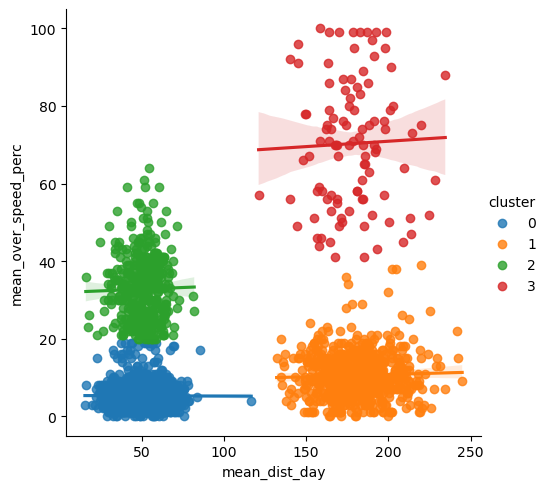

In [29]:
sns.lmplot(data=df, x='mean_dist_day',y='mean_over_speed_perc',hue='cluster')

In [31]:
silhouette_score(features,cluster.labels_)

np.float64(0.7848971045957268)

In [32]:
kmeans.inertia_

739.5188572469483

#### Elbow Method

In [33]:
inertia=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)

[8000.000000000001, 5117.240449333776, 1756.5536159472445, 739.5188572469483, 675.4965969501876, 502.1189726386459, 481.92408918610994, 451.30789614351085, 346.1383138711034, 308.9760006332391]


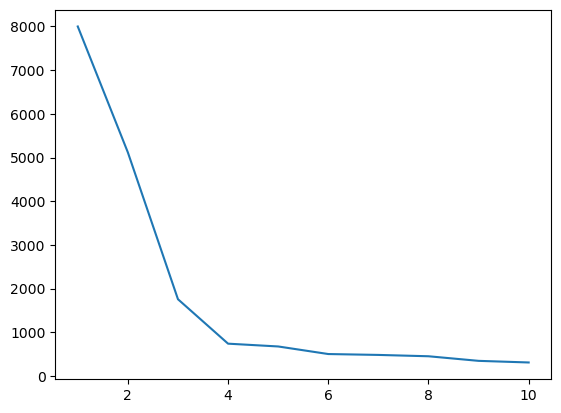

In [34]:
plt.plot(range(1,11) ,inertia)
plt